In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import fireworks.ic as fic
import fireworks.nbodylib.integrators as fint
import fireworks.nbodylib.dynamics as fdyn
import fireworks.nbodylib.timesteps as fdt
from fireworks.particles import Particles










In [2]:
# Simulation for trajectory
def simulate_trajectory(integrator, planets,adaptive_dt, dynamics):
    position = []
    velocity = []
    time = []
    acceleration = []
    potential = []
    total_energy = []
    error = []
    t = 0.
#
    velocity.append(planets.vel.copy())
    position.append(planets.pos.copy())
    initial_acc = dynamics(planets)
    acceleration.append(initial_acc[0].copy() if initial_acc is not None else np.zeros_like(planets.pos[0]))
    total_energy.append(planets.Etot()[0])
    error.append(np.zeros_like(planets.Etot()[0]))
    time.append(t)

    Tperiod = 64#np.sqrt(np.sum(planets.mass) / np.linalg.norm(planets.pos[0] - planets.pos[1]) ** 3)
    

    while t < Tperiod:
        tmin =0.001
        dt = adaptive_dt(planets,tmin)
        # print(f"dt is {dt}")
        t += dt
        # print(t)
        planets, _, acc, _, pot = integrator(particles=planets, tstep=dt, acceleration_estimator=dynamics)
        Etot = planets.Etot()[0]
        Error = (Etot - total_energy[-1])/total_energy[-1]
        position.append(planets.pos.copy())
        velocity.append(planets.vel.copy())
        acceleration.append(acc)
        potential.append(pot)
        total_energy.append(Etot)
        error.append(Error)

        time.append(t)

    position = np.array(position)
    velocity = np.array(velocity)
    acceleration = np.array([acc for acc in acceleration if acc is not None])
    potential = np.array(potential)
    time = np.array(time)
    total_energy = np.array(total_energy)
    error = np.array(error)
   
    return position, velocity, acceleration,initial_acc, potential, time, total_energy, error

# Defining plot

In [3]:
def plot_2d_trajectory(position,ax,label):
    num_particles = position.shape[1]  # Assuming position has shape (time_steps, num_particles, 3)

    for particle_index in range(num_particles):
        x_particle, y_particle = position[:, particle_index, 0], position[:, particle_index, 1]
        ax.plot(x_particle, y_particle, marker=',', label=f'Particle {particle_index + 1} - {label}')

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
   

    ax.legend(fontsize='small')

In [4]:
def plot_trajectory(position, ax, label):
    num_particles = position.shape[1]  # Assuming position has shape (time_steps, num_particles, 3)

    for particle_index in range(num_particles):
        x_particle, y_particle, z_particle = position[:, particle_index, 0], position[:, particle_index, 1], position[:, particle_index, 2]
        ax.plot(x_particle, y_particle, z_particle, marker=',', label=f'Particle {particle_index + 1} - {label}')

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-5,5)

    ax.legend(fontsize='small')


In [5]:
def plot_energy(total_energy, ax, label):
    ax.plot(t, total_energy, marker=',', label=f'Particle 1 - {label}')

    ax.set_xlabel('Time')
    ax.set_ylabel('Total Energy')

    ax.legend(fontsize='small')

In [6]:
def plot_energy_loss(error, ax, label):
    ax.plot(t, error, marker=',', label=f'Particle 1 - {label}')

    ax.set_xlabel('Time')
    ax.set_ylabel('Energy Error')

    ax.legend(fontsize='small')

##########################0########################################
############<function euler_integrator at 0x7f0bc3d5ba30>##################
############<function velocity_verlet_integrator at 0x7f0bc3d5bb50>##################
############<function symplectic_leapfrog_integrator at 0x7f0bc3d5bac0>##################
############<function runge_kutta_4_integrator at 0x7f0bc3d5bbe0>##################
############<function integrator_tsunami at 0x7f0bc3d5bc70>##################
##########################0.5########################################
############<function euler_integrator at 0x7f0bc3d5ba30>##################
############<function velocity_verlet_integrator at 0x7f0bc3d5bb50>##################
############<function symplectic_leapfrog_integrator at 0x7f0bc3d5bac0>##################
############<function runge_kutta_4_integrator at 0x7f0bc3d5bbe0>##################
############<function integrator_tsunami at 0x7f0bc3d5bc70>##################
##########################0.9#####

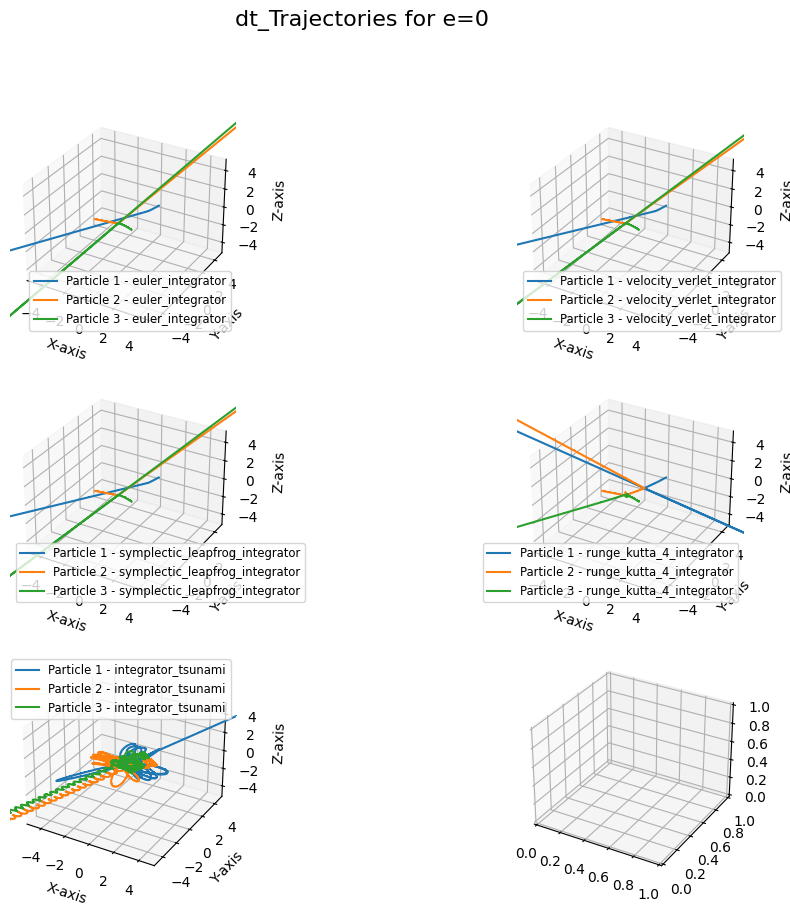

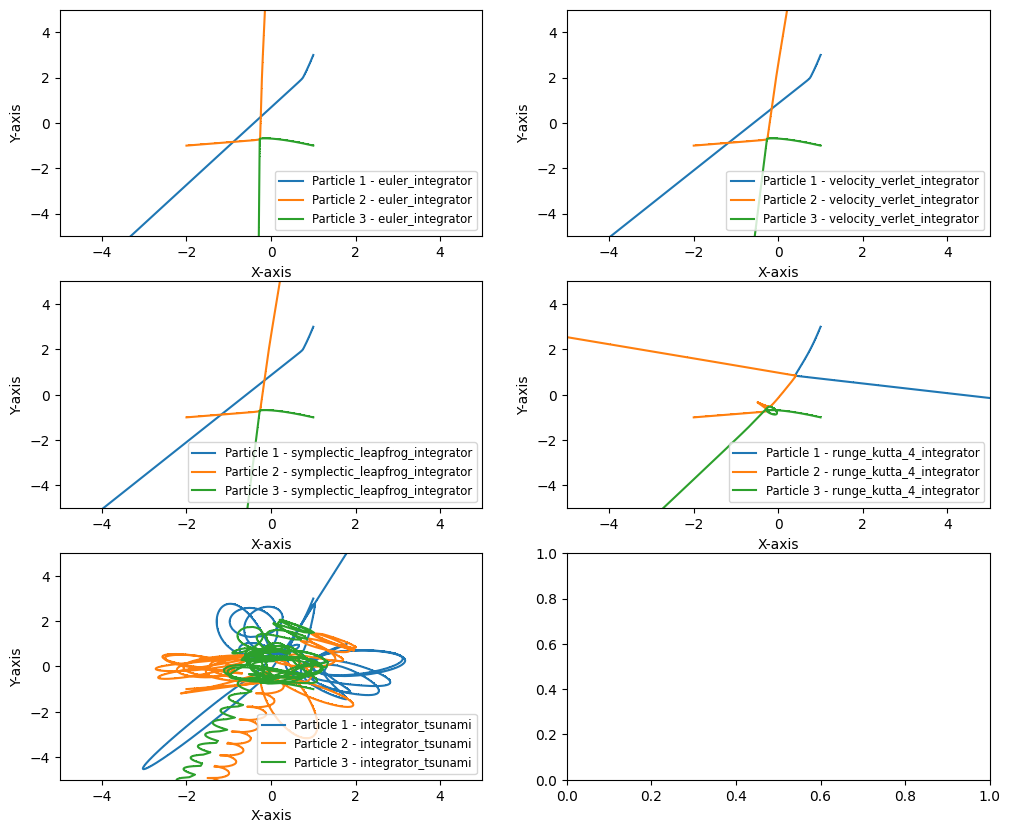

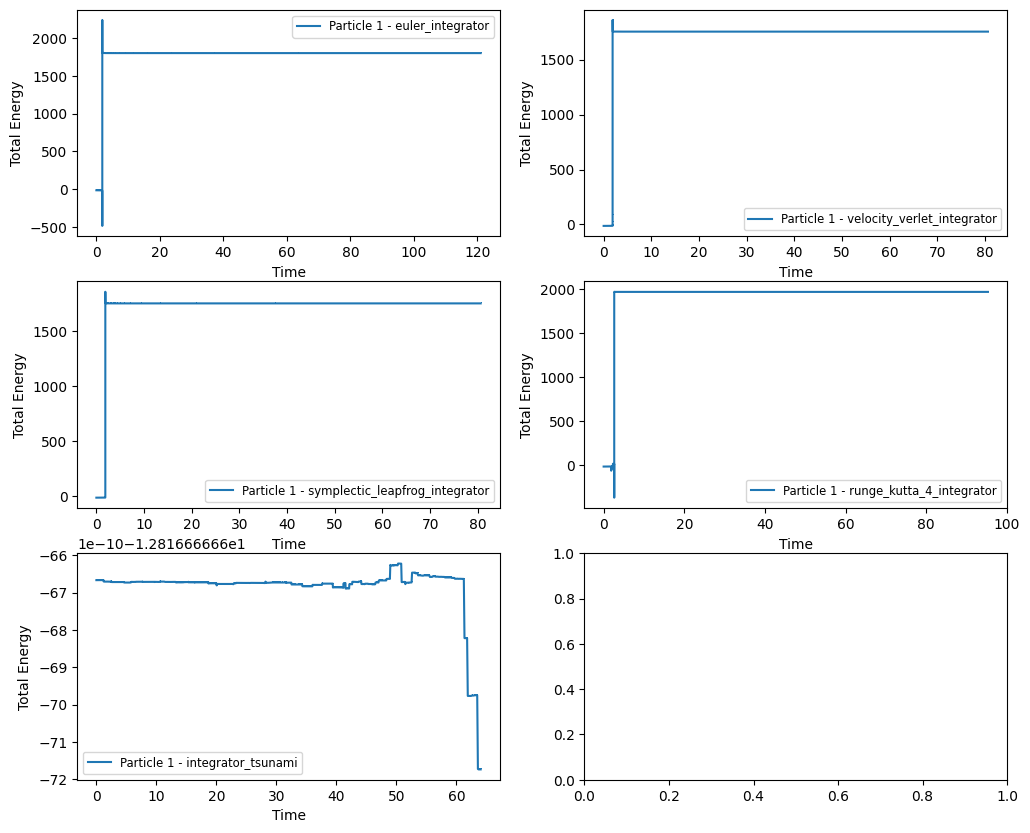

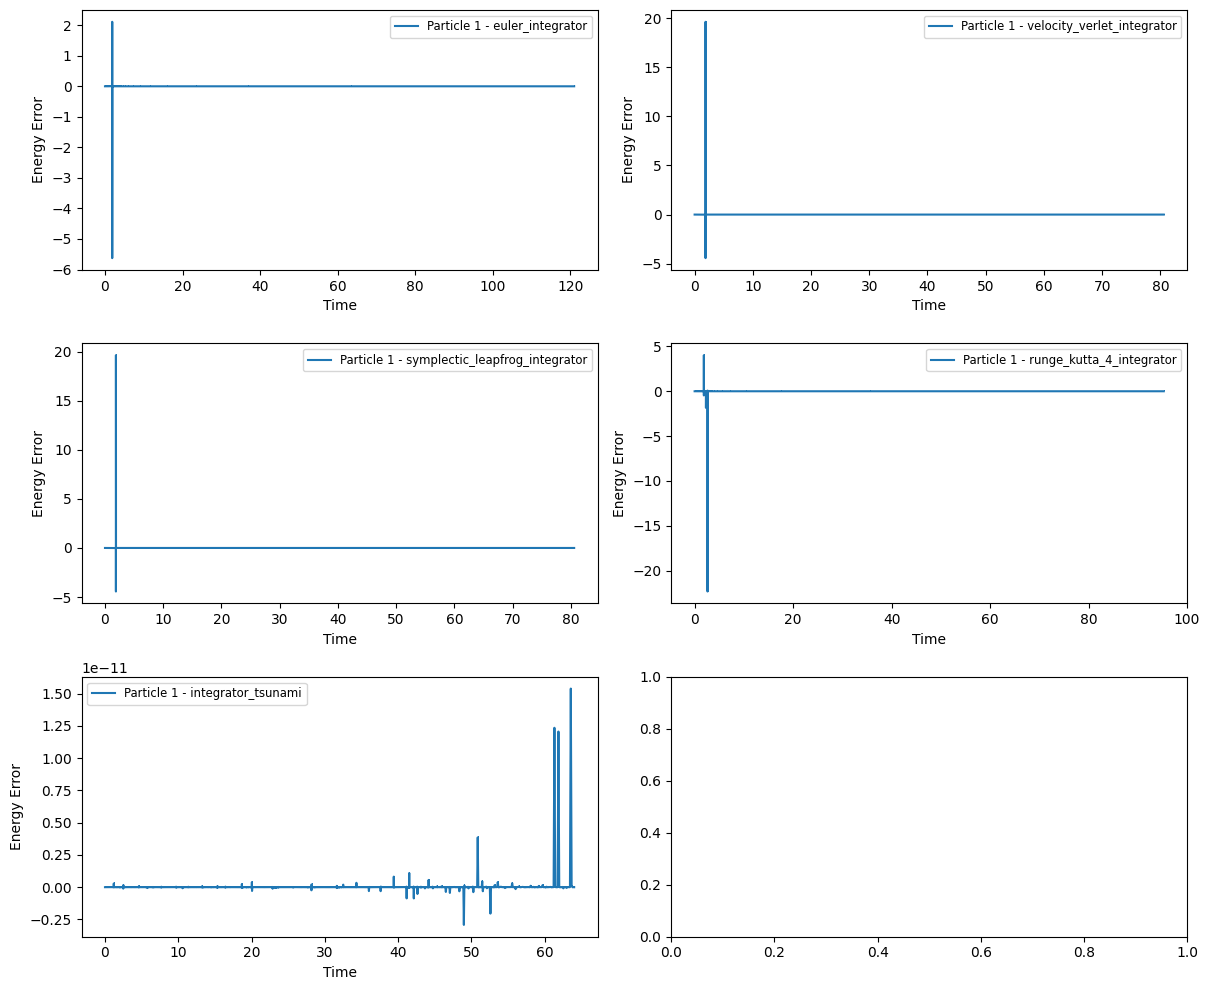

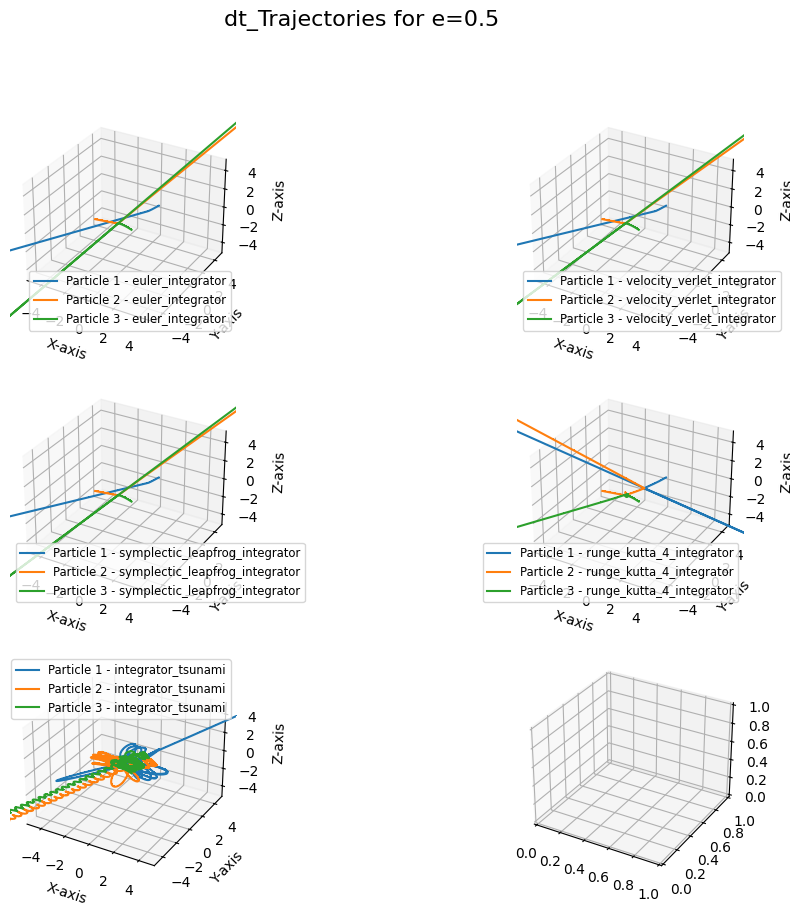

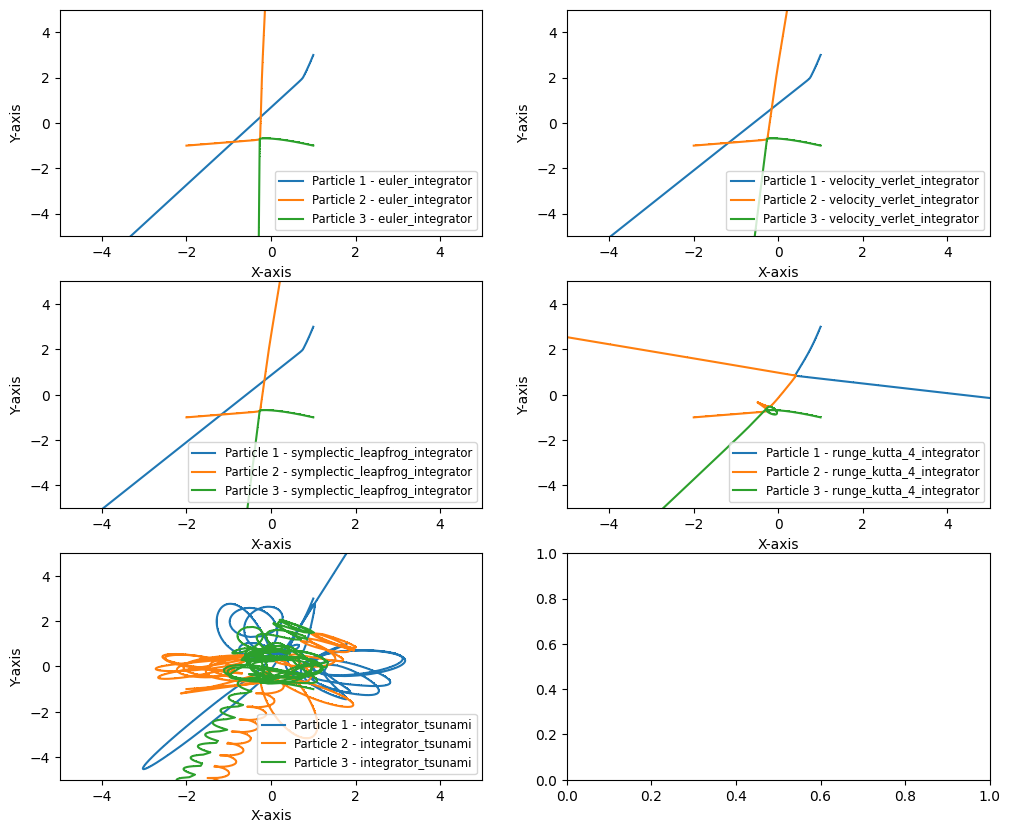

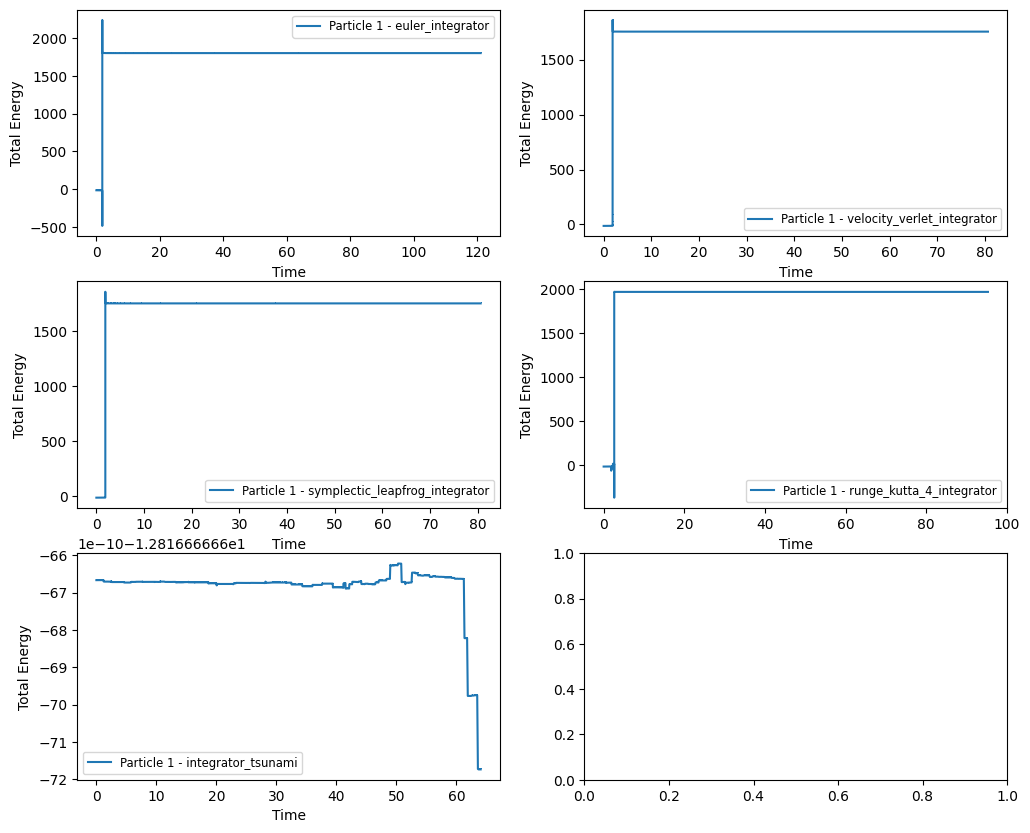

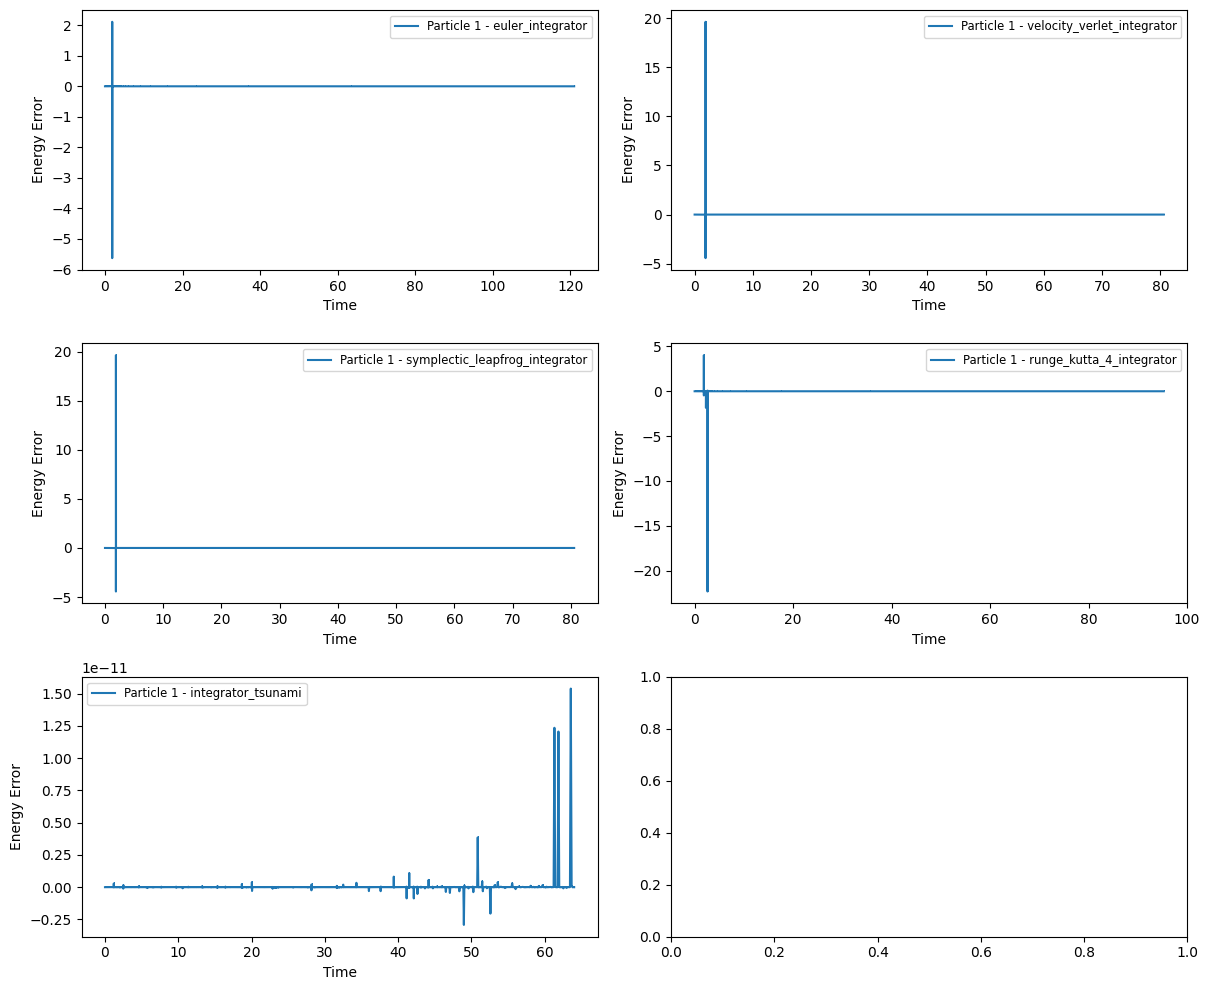

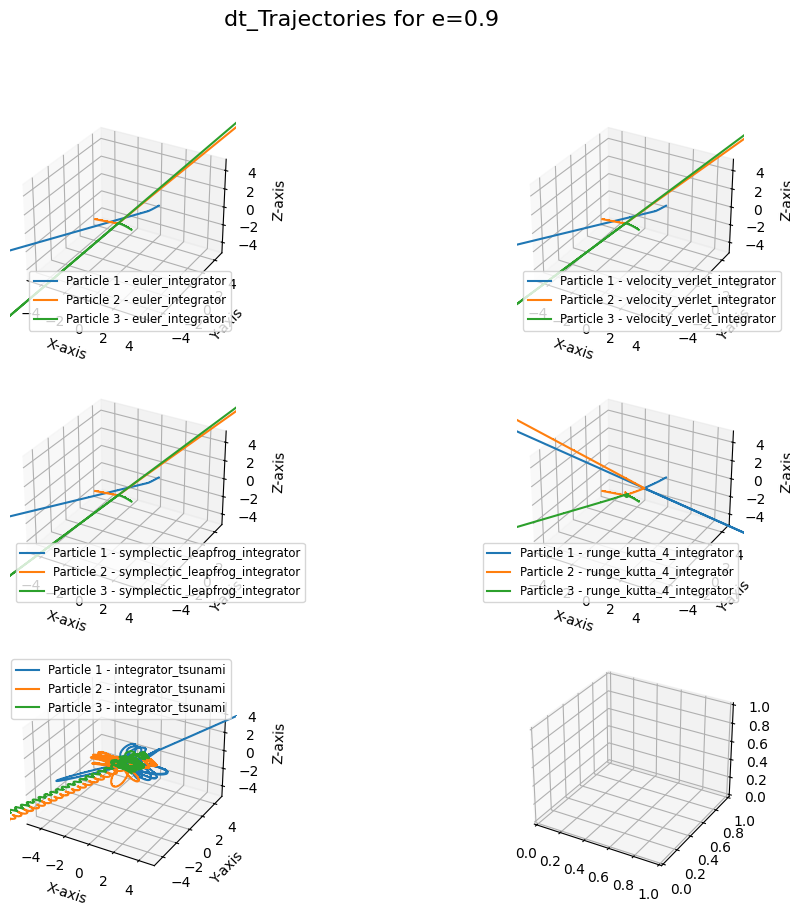

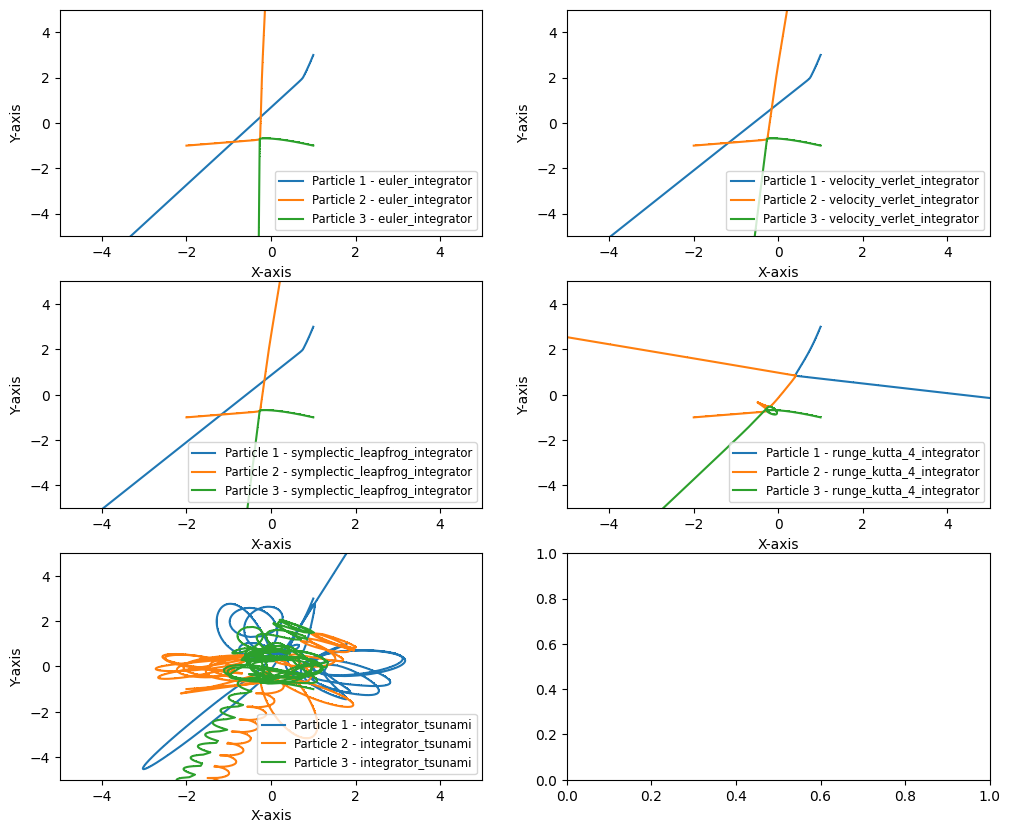

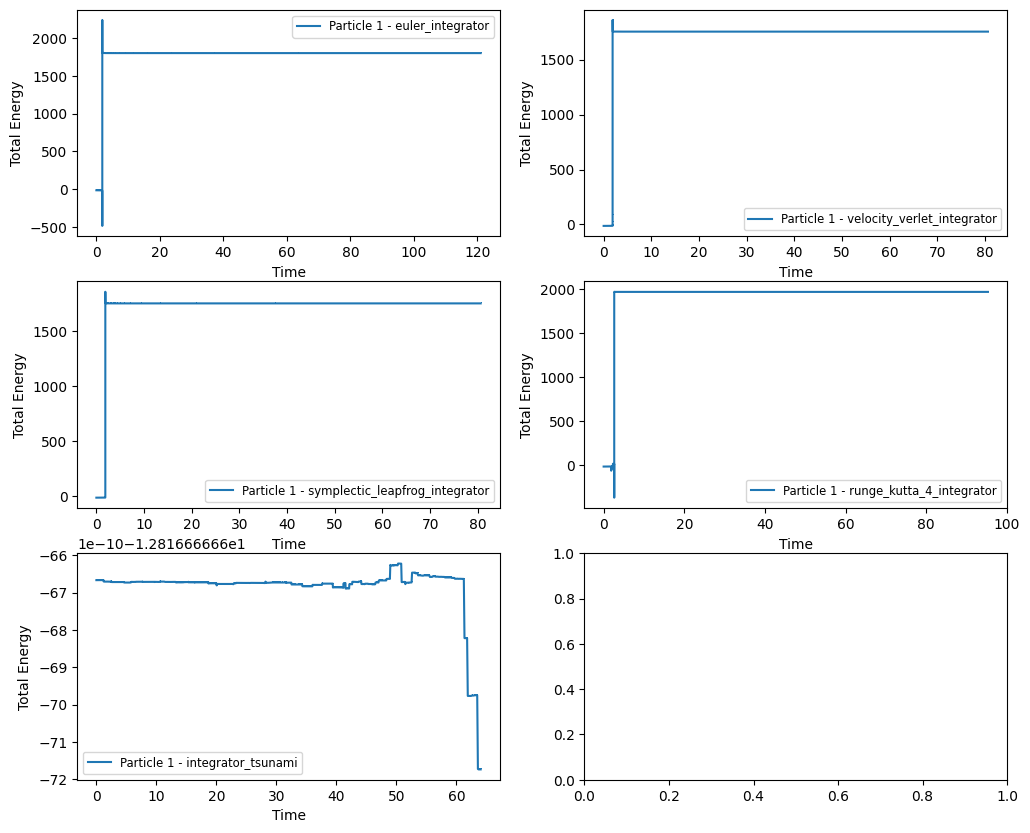

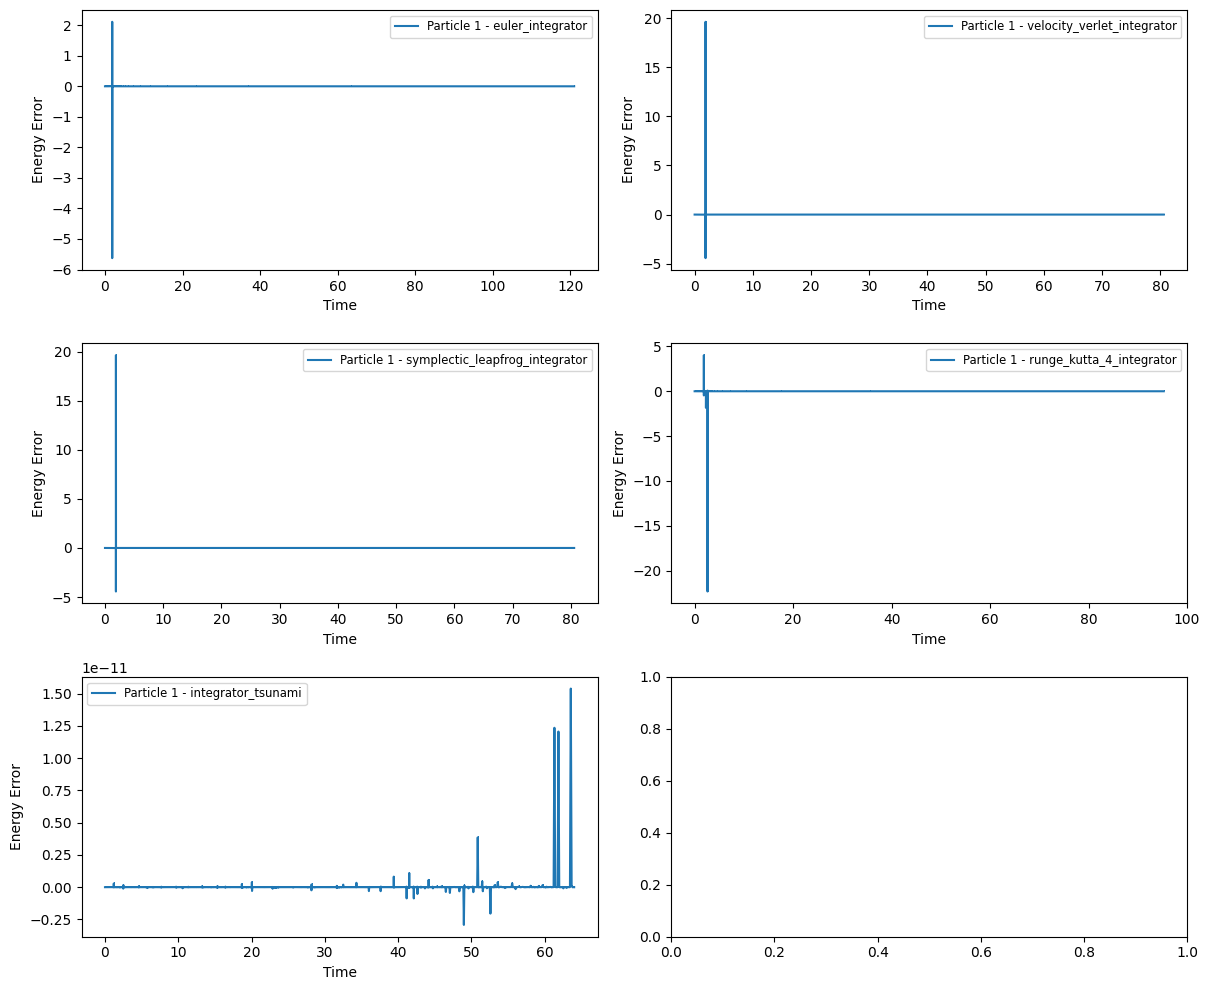

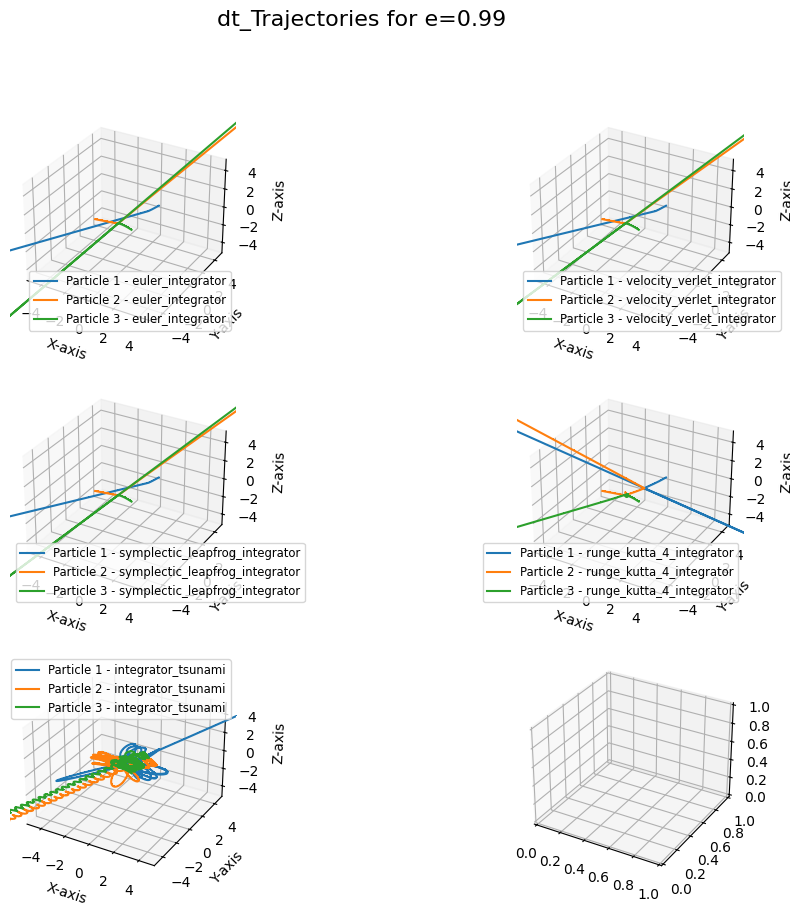

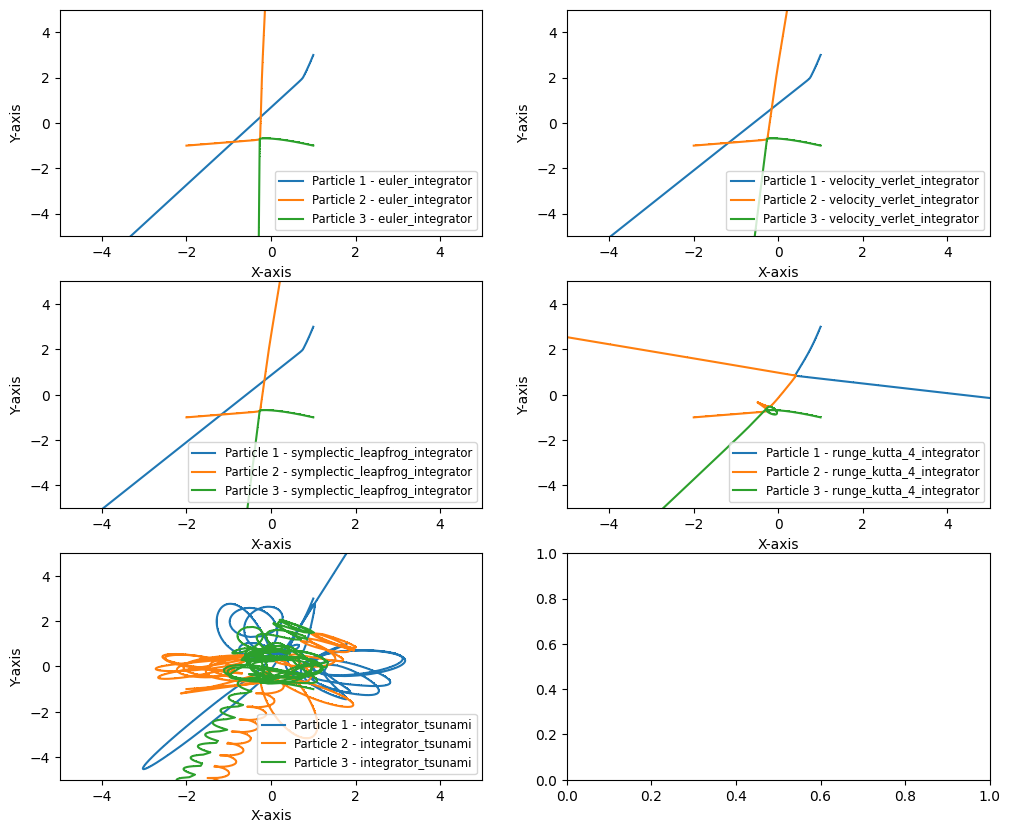

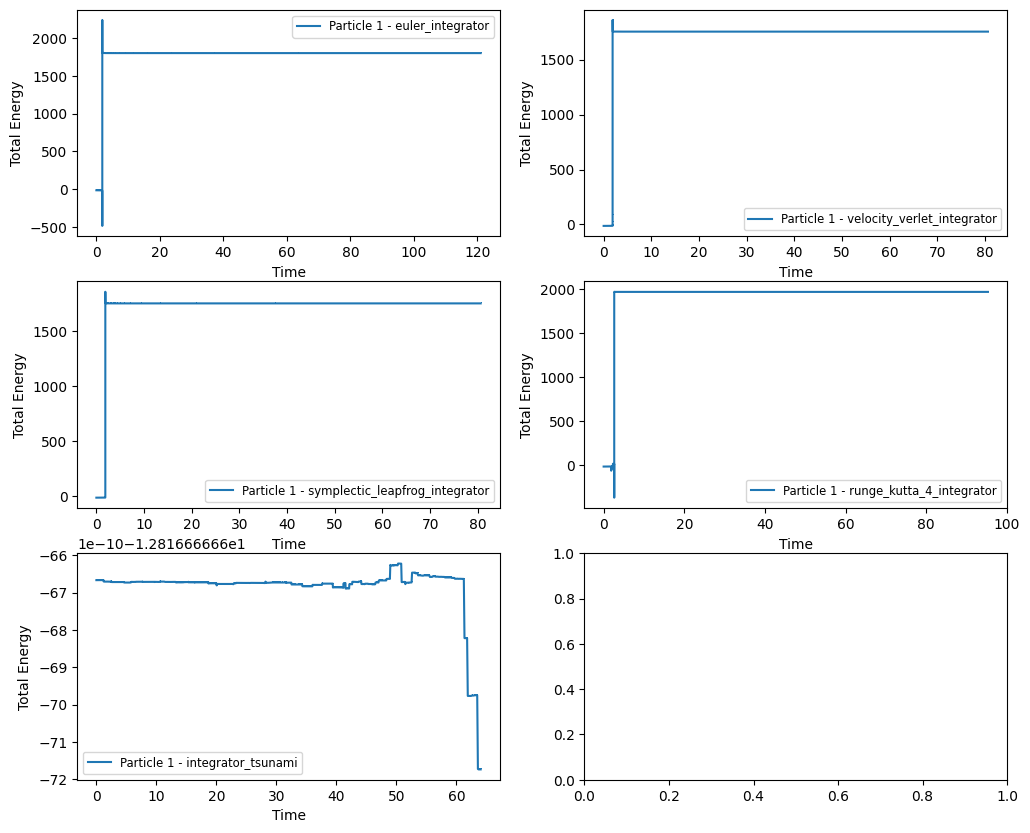

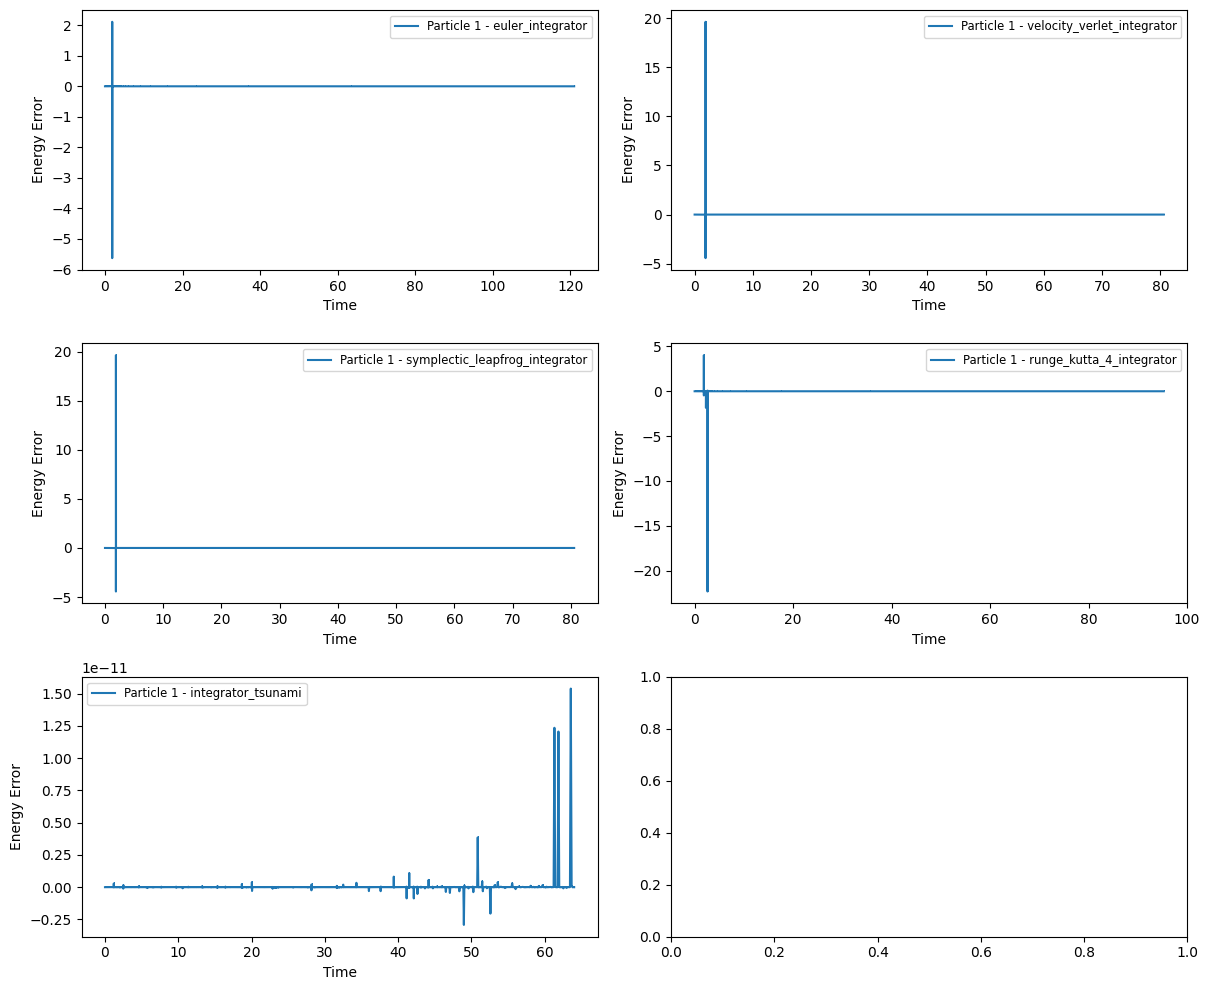

In [7]:
############################# Main #####################################

# Different eccentricities
eccentricities = [0,0.5, 0.9, 0.99]
# Different integrators
integrators = [fint.euler_integrator,fint.velocity_verlet_integrator,
               fint.symplectic_leapfrog_integrator,fint.runge_kutta_4_integrator,fint.integrator_tsunami]

# Creating subplots
for e in eccentricities:
    print(f"##########################{e}########################################")
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), subplot_kw={'projection': '3d'})
    axes = axes.flatten()
    
    fig_2d, axes_2d = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
    axes_2d = axes_2d.flatten()
    
    fig_tot_energy, axes_tot_energy = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
    axes_tot_energy = axes_tot_energy.flatten()
    
    fig_error, axes_loss = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
    axes_loss = axes_loss.flatten()
   

    for integrator, ax,ax_2d, ax_en, ax_loss in zip(integrators, axes,axes_2d, axes_tot_energy, axes_loss):
        
      
        position=np.array([[1.,3.,0.],[-2.,-1.,0.],[1.,-1.,0.]])
        velocity=np.array([[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]])
        mass=np.array([3.,4.,5.])
        planets = Particles(position,velocity,mass)
        planets.set_acc(fdyn.acceleration_pyfalcon(planets.copy())[0])
       
        # print(planets.radius())
        # print(planets.vel_mod())
        # print(planets.acc_mod())
        # print(np.nanmin(planets.vel_mod()/planets.acc_mod()))
        # dt = fdt.adaptive_timestep_pos_acc(planets,0.001)#0.01
        
        
        print(f"############{integrator}##################")
        position, _, acc, _, _, t, tot_en, error = simulate_trajectory(integrator, planets,fdt.adaptive_timestep_pos_acc, fdyn.acceleration_pyfalcon)
        # print(t)

        plot_trajectory(position, ax, f'{integrator.__name__}')
        plot_2d_trajectory(position,ax_2d, f'{integrator.__name__}')
        plot_energy(tot_en, ax_en, f'{integrator.__name__}')
        plot_energy_loss(error, ax_loss, f'{integrator.__name__}')

    fig.suptitle(f'dt_Trajectories for e={e}', fontsize=16)
    plt.tight_layout()
    
    # fig.savefig(f"dt_Trajectories_e_{e}.png")
    # fig_tot_energy.savefig(f"dt_TotalEnergy_e_{e}.png")
    # fig_error.savefig(f"dt_Energy_loss_e_{e}.png")